# Introduction

* Comparison of the time-series data from *a posteriori* test for LSTM and NODE.

In [1]:
import numpy as np
from scipy import interpolate
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dt_T_lstm =  0.5
seq_len_lstm =  36 # 38
target_T = 1.0
dt_target = target_T/seq_len_lstm
seq_len_lstm = np.max([int(dt_T_lstm/dt_target), 1])
batch_size = 10
fname_LSTM = f'Data_models/Out_PhydtmEnergy1_interpIO1_setdt1-T{dt_T_lstm}_'\
           f'IPtime0_IPKEPEtime0_IPFrGn0_F4R32_PyTModel_LSTM_seqlen{seq_len_lstm}_'\
           f'nLSTMLayers4_hiddensize10_nMLPLayers1_nNeurons15_batch{batch_size}_'\
           f'lr0.001_scaleDataFalse_nin4_Ntrain0.9_nepoch4000_ODE_testdata_F4R32_tout30_toff0.npz'

In [3]:
data = np.load(fname_LSTM)
print(data.files)
q_true_LSTM = data['q_ODE']
q_ML_LSTM = data['q_ML']
time_LSTM = data['t']
q_DNS_LSTM = data['q_true']
time_true_LSTM = data['test_time']
totalEt0 = data['totalEt0']
Nfreq = data['Nfreq']
n_outputs = q_true_LSTM.shape[1]

# interpolate q_DNS_LSTM to time_LSTM
finterp = interpolate.interp1d(time_true_LSTM, q_DNS_LSTM, axis=0, kind='cubic', fill_value="extrapolate")
q_true_LSTM_interp = finterp(time_LSTM)

['test_time', 'q_true', 't', 'q_ODE', 'q_ML', 'totalEt0', 'Nfreq', 'data_op_varnames']


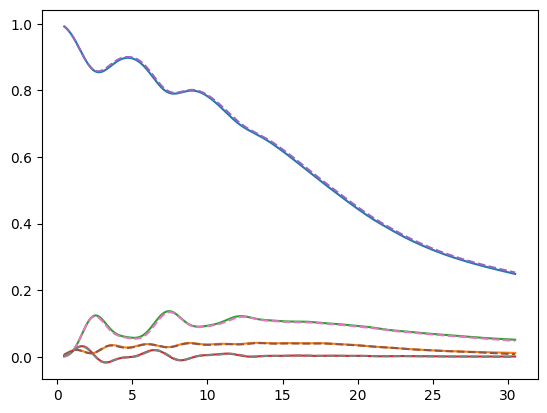

In [4]:
# plt.plot(time_true_LSTM, q_DNS_LSTM, '-')
plt.plot(time_LSTM, q_true_LSTM_interp, '-')
plt.plot(time_LSTM, q_ML_LSTM, '--')

In [5]:
dt_T_node =  0.9
seq_len_node =  36 # 35
target_T = 1.0
dt_target = target_T/seq_len_node
seq_len_node = np.max([int(dt_T_node/dt_target), 1])
batch_size = 10
fname_NODE = f'Data_models/Out_normEnergy1_interpIO1_setdt1-T{dt_T_node}_'\
           f'IPtime0_IPKEPEtime0_IPFrGn0_F4R32_PyTModel_NODE_MLP_seqlen{seq_len_node}_'\
           f'nMLPLayers10_nNeurons40_batch{batch_size}_'\
           f'lr0.05_scaleDataFalse_nin4_Ntrain0.9_nepoch1000_ODE_testdata_F4R32_tout30.0_toff0.0.npz'

In [6]:
data = np.load(fname_NODE)
print(data.files)
q_true_NODE = data['q_ODE']
q_ML_NODE = data['q_ML']
time_NODE = data['t']
q_DNS_NODE = data['q_true']
time_true_NODE = data['test_time']

# q_true_LSTM = data['q_ODE']
# q_ML_LSTM = data['q_ML']
# time_LSTM = data['t']
# q_DNS_LSTM = data['q_true']
# time_true_LSTM = data['test_time']
# totalEt0 = data['totalEt0']
# Nfreq = data['Nfreq']
# n_outputs = q_true_LSTM.shape[1]

# # normalize NODE data
# q_true_NODE[:,0] /= (2*totalEt0)
# q_true_NODE[:,1] /= (2*totalEt0)
# q_true_NODE[:,2] /= (2*Nfreq**2 * totalEt0)
# q_true_NODE[:,3] /= (2*Nfreq * totalEt0)
# q_ML_NODE[:,0] /= (2*totalEt0)
# q_ML_NODE[:,1] /= (2*totalEt0)
# q_ML_NODE[:,2] /= (2*Nfreq**2 * totalEt0)
# q_ML_NODE[:,3] /= (2*Nfreq * totalEt0)

# interpolate q_DNS_LSTM to time_NODE
finterp = interpolate.interp1d(time_true_LSTM, q_DNS_LSTM, axis=0, kind='cubic', fill_value="extrapolate")
q_true_NODE_interp = finterp(time_NODE)

['test_time', 'q_true', 't', 'q_ODE', 'q_ML', 'dq_ODE', 'dq_ML', 'totalEt0', 'Nfreq', 'data_ip_varnames', 'data_dy_varnames']


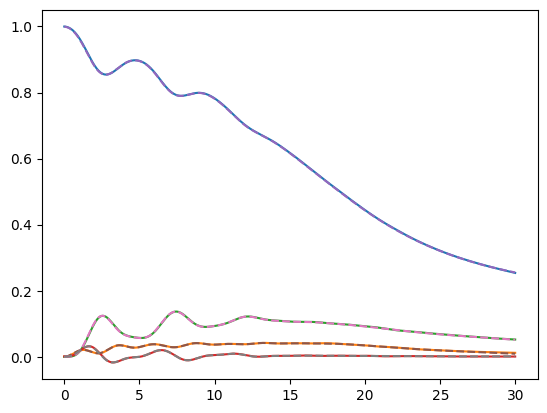

In [7]:
# plt.plot(time_NODE, q_true_NODE, '-')
plt.plot(time_NODE, q_true_NODE_interp, '-')
plt.plot(time_NODE, q_ML_NODE, '--')

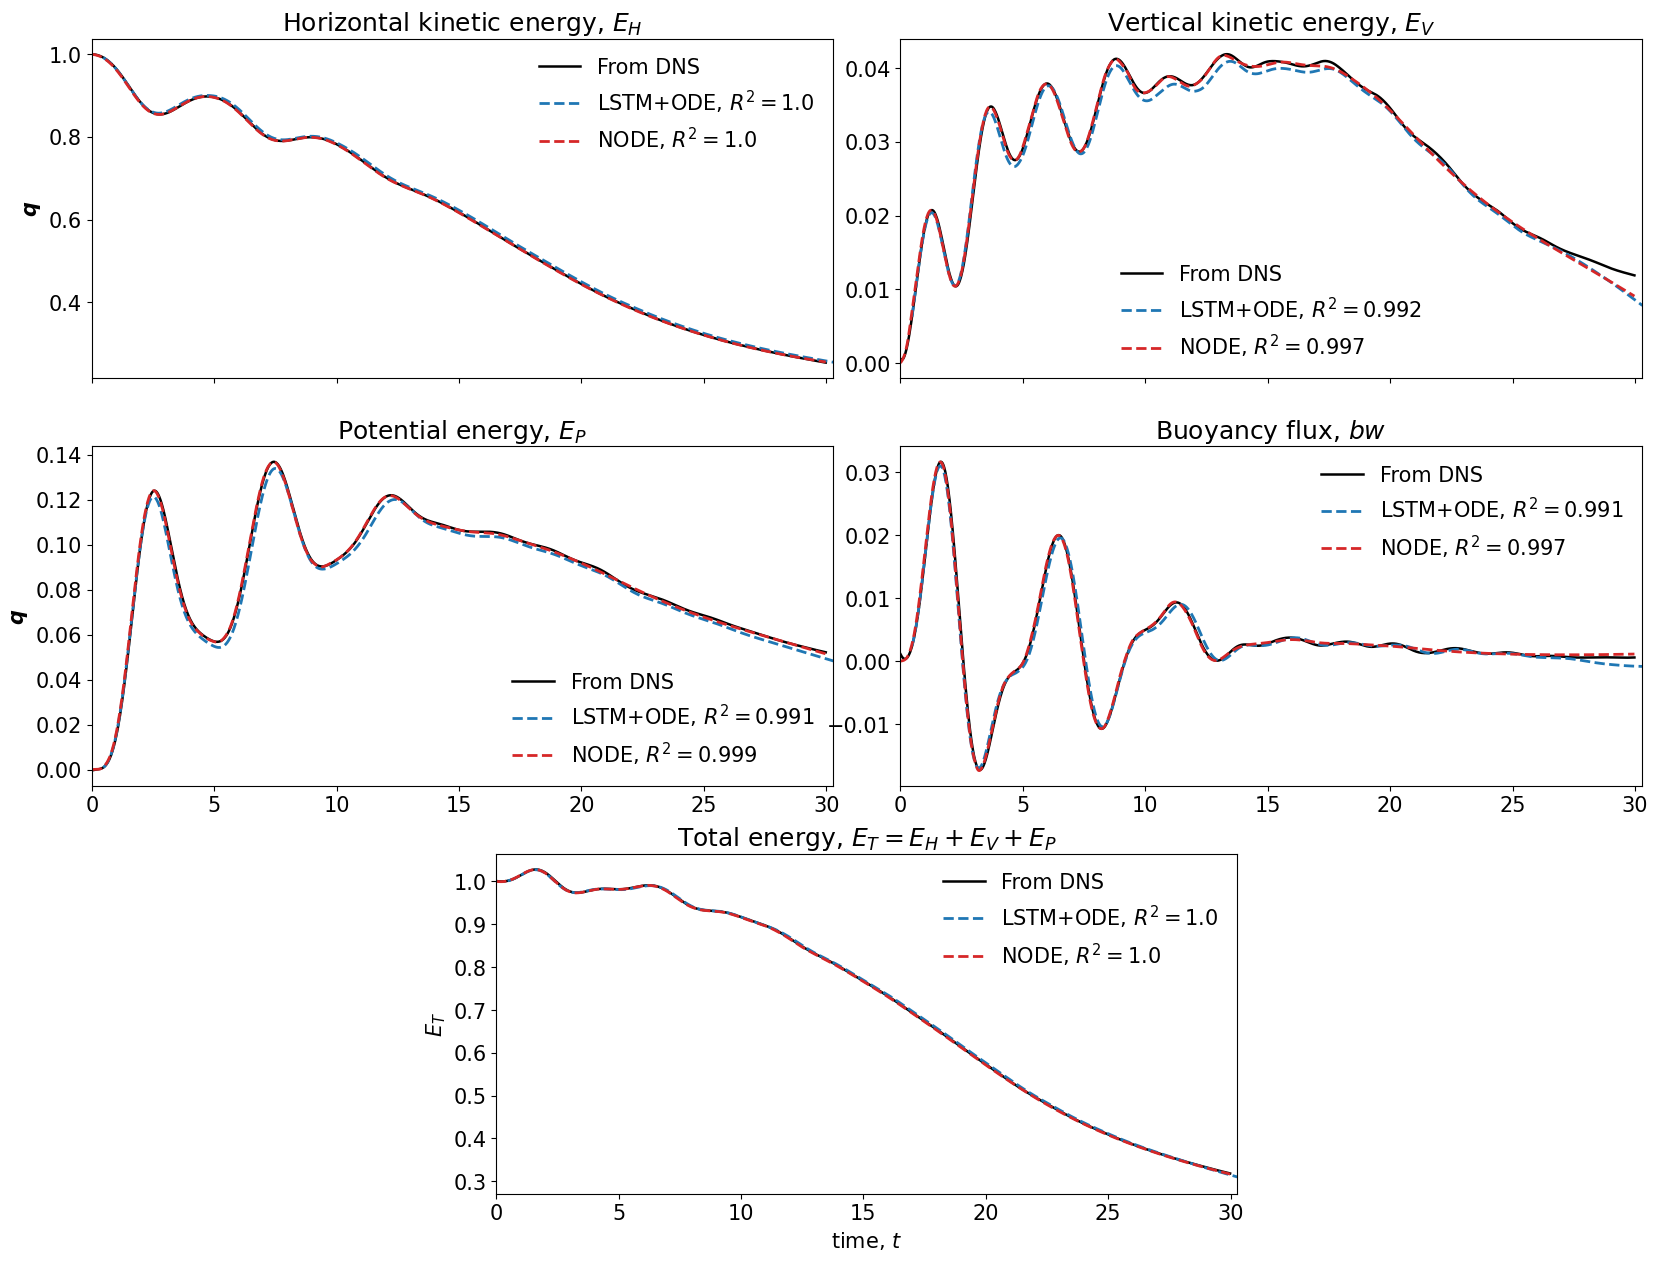

In [8]:
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(20,15), facecolor="1")

spec = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
ax00 = fig.add_subplot(spec[0,0:2])
ax01 = fig.add_subplot(spec[0,2:4])
ax10 = fig.add_subplot(spec[1,0:2])
ax11 = fig.add_subplot(spec[1,2:4])
ax20 = fig.add_subplot(spec[2,1:3])

i = 0
ax00.plot(time_NODE, q_true_NODE_interp[:,i],'-', color='black', linewidth=1.8, label='From DNS')
tempID = [time_LSTM[:]<time_true_LSTM[-1]][0]
r2_LSTM = metrics.r2_score(q_true_LSTM_interp[tempID,i], q_ML_LSTM[tempID,i])
ax00.plot(time_LSTM, q_ML_LSTM[:,i],'--', color='tab:blue', linewidth=2, label=f'LSTM+ODE, $R^2 = {r2_LSTM:0.3}$')
r2_NODE = metrics.r2_score(q_true_NODE_interp[:,i], q_ML_NODE[:,i])
ax00.plot(time_NODE, q_ML_NODE[:,i],'--', color='tab:red', linewidth=2, label=f'NODE, $R^2 = {r2_NODE:0.3}$')
ax00.legend(frameon=False);
ax00.set_xlim([time_NODE[0], 1.01*time_NODE[-1]])
ax00.set_title(r'Horizontal kinetic energy, $E_H$')
ax00.set_xticklabels([])
ax00.set_ylabel(r'$\boldsymbol{q}$')

i = 1
ax01.plot(time_NODE, q_true_NODE_interp[:,i],'-', color='black', linewidth=1.8, label='From DNS')
tempID = [time_LSTM[:]<time_true_LSTM[-1]][0]
r2_LSTM = metrics.r2_score(q_true_LSTM_interp[tempID,i], q_ML_LSTM[tempID,i])
ax01.plot(time_LSTM, q_ML_LSTM[:,i],'--', color='tab:blue', linewidth=2, label=f'LSTM+ODE, $R^2 = {r2_LSTM:0.3}$')
r2_NODE = metrics.r2_score(q_true_NODE_interp[:,i], q_ML_NODE[:,i])
ax01.plot(time_NODE, q_ML_NODE[:,i],'--', color='tab:red', linewidth=2, label=f'NODE, $R^2 = {r2_NODE:0.3}$')
ax01.legend(frameon=False);
ax01.set_xlim([time_NODE[0], 1.01*time_NODE[-1]])
ax01.set_title(r'Vertical kinetic energy, $E_V$')
ax01.set_xticklabels([])

i = 2
ax10.plot(time_NODE, q_true_NODE_interp[:,i],'-', color='black', linewidth=1.8, label='From DNS')
tempID = [time_LSTM[:]<time_true_LSTM[-1]][0]
r2_LSTM = metrics.r2_score(q_true_LSTM_interp[tempID,i], q_ML_LSTM[tempID,i])
ax10.plot(time_LSTM, q_ML_LSTM[:,i],'--', color='tab:blue', linewidth=2, label=f'LSTM+ODE, $R^2 = {r2_LSTM:0.3}$')
r2_NODE = metrics.r2_score(q_true_NODE_interp[:,i], q_ML_NODE[:,i])
ax10.plot(time_NODE, q_ML_NODE[:,i],'--', color='tab:red', linewidth=2, label=f'NODE, $R^2 = {r2_NODE:0.3}$')
ax10.legend(frameon=False);
ax10.set_xlim([time_NODE[0], 1.01*time_NODE[-1]])
ax10.set_title(r'Potential energy, $E_P$')
ax10.set_ylabel(r'$\boldsymbol{q}$')

i = 3
ax11.plot(time_NODE, q_true_NODE_interp[:,i],'-', color='black', linewidth=1.8, label='From DNS')
tempID = [time_LSTM[:]<time_true_LSTM[-1]][0]
r2_LSTM = metrics.r2_score(q_true_LSTM_interp[tempID,i], q_ML_LSTM[tempID,i])
ax11.plot(time_LSTM, q_ML_LSTM[:,i],'--', color='tab:blue', linewidth=2, label=f'LSTM+ODE, $R^2 = {r2_LSTM:0.3}$')
r2_NODE = metrics.r2_score(q_true_NODE_interp[:,i], q_ML_NODE[:,i])
ax11.plot(time_NODE, q_ML_NODE[:,i],'--', color='tab:red', linewidth=2, label=f'NODE, $R^2 = {r2_NODE:0.3}$')
ax11.legend(frameon=False);
ax11.set_xlim([time_NODE[0], 1.01*time_NODE[-1]])
ax11.set_title(r'Buoyancy flux, $bw$')

ax20.plot(time_NODE, np.sum(q_true_NODE_interp, axis=1),'-', color='black', linewidth=1.8, label='From DNS')
tempID = [time_LSTM[:]<time_true_LSTM[-1]][0]
r2_LSTM = metrics.r2_score(np.sum(q_true_LSTM_interp[tempID,:], axis=1), np.sum(q_ML_LSTM[tempID,:], axis=1))
ax20.plot(time_LSTM, np.sum(q_ML_LSTM, axis=1),'--', color='tab:blue', linewidth=2, label=f'LSTM+ODE, $R^2 = {r2_LSTM:0.3}$')
r2_NODE = metrics.r2_score(np.sum(q_true_NODE_interp, axis=1), np.sum(q_ML_NODE, axis=1))
ax20.plot(time_NODE, np.sum(q_ML_NODE, axis=1),'--', color='tab:red', linewidth=2, label=f'NODE, $R^2 = {r2_NODE:0.3}$')
ax20.legend(frameon=False);
ax20.set_xlim([time_NODE[0], 1.01*time_NODE[-1]])
ax20.set_ylabel(r'$E_T$')

ax20.set_xlabel(r'time, $t$')
ax20.set_title(r'Total energy, $E_T = E_H + E_V + E_P$');

# plt.savefig('Figs/compare_LSTM-NODE.pdf', format='pdf', bbox_inches='tight') #,dpi=100)